# 프로젝트 개요
- 강의명 : (산대특)_공공데이터 활용 빅데이터 분석 및 시각화 전문가 과정 육성
- 교과목명 : 머신러닝 기초
- 프로젝트 주제 : wine 데이터를 활용한 분류 모형 만들기
- 프로젝트 마감일 : 2022년 10월 21일 금요일
- 수강생명 : 임 한 용

## 평가 1. 데이터 수집
- 와인 데이터셋을 판다스 데이터 프레임으로 불러들인다. 
- Describe 함수를 사용하여 각 변수의 평균과 표준편차를 구한다.
  + alcohol (평균/표준편차)
  + sugar (평균/표준편차)
  + pH (평균/표준편차)

## 와인의 데이터셋을 판다스 프레임으로 불러들인다.

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


- alcohol : 알코올 도수
- sugar : 당도
- pH : pH 값
- class : 0이면 레드 와인 / 1이면 화이트 와인

## Describe 함수를 사용하여 각 변수의 평균과 표준편차를 구한다. 

- 데이터의 평균과 표준편차를 구하기 위해서 받아 들인 데이터를 변경하고 셋트를 분리한다.


In [2]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

data.shape, target.shape # 잘 들어왔는지 확인

((6497, 3), (6497,))

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state = 42)
train_input.shape, test_input.shape, train_target.shape, test_target.shape


((5197, 3), (1300, 3), (5197,), (1300,))

## 3가지 데이터를 표준화한다.
-- alcohol : 알코올도수   -- sugar : 당도   -- pH : pH 값 

In [10]:
from sklearn.preprocessing import StandardScaler 

ss = StandardScaler()
ss.fit(train_input) 

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 데이터의 모형을 만들어 준다
- 평균값을 구하고 표준편차 및 최적값을 구한다.

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [23]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [24]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


- 보고서 작성
  + 알코올 도수의 기울기는 0.51, 당도의 기울기는 1.67, ph의 기울기는 -0.68, 상수는 1.81

## 표준편차가 가장 적합하게 만든다.
- site 참조 : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [17]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


## 평가 2. 데이터 시각화
- 종속변수를 기준으로 각 변수의 박스플롯을 작성한다. 
- 각 변수별 조합을 통해 산점도를 작성한다. 

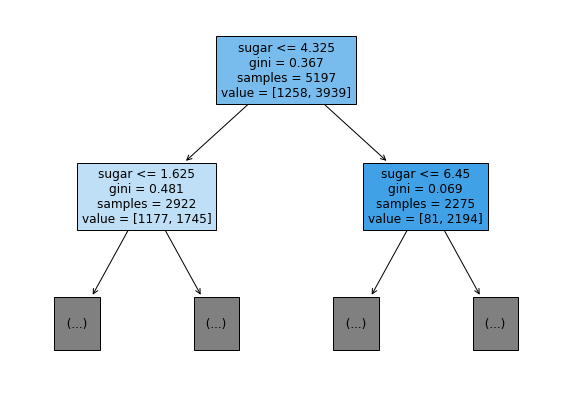

In [25]:
fig, ax = plt.subplots(figsize=(10, 7))
plot_tree(dt, 
          max_depth = 1, 
          filled=True, 
          feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

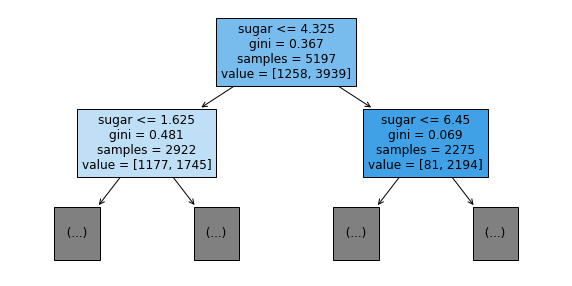

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_tree(dt, 
          max_depth = 1, 
          filled=True, 
          feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

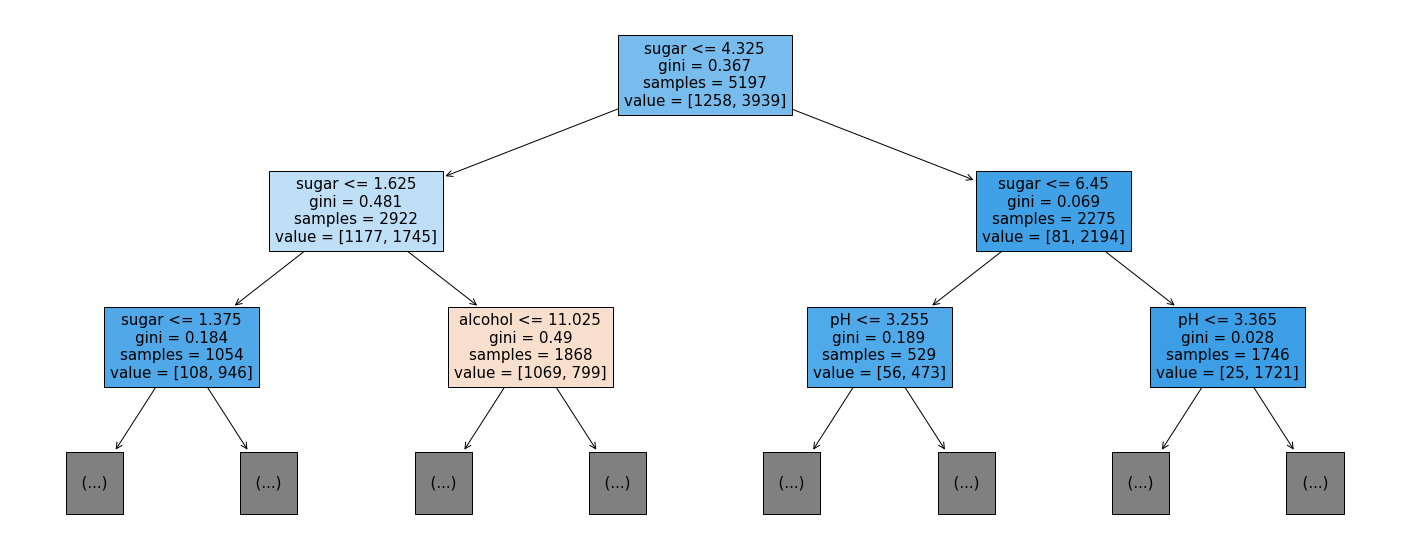

In [38]:
fig, ax = plt.subplots(figsize=(25, 10))
plot_tree(dt, 
          max_depth = 2, 
          filled=True, 
          feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

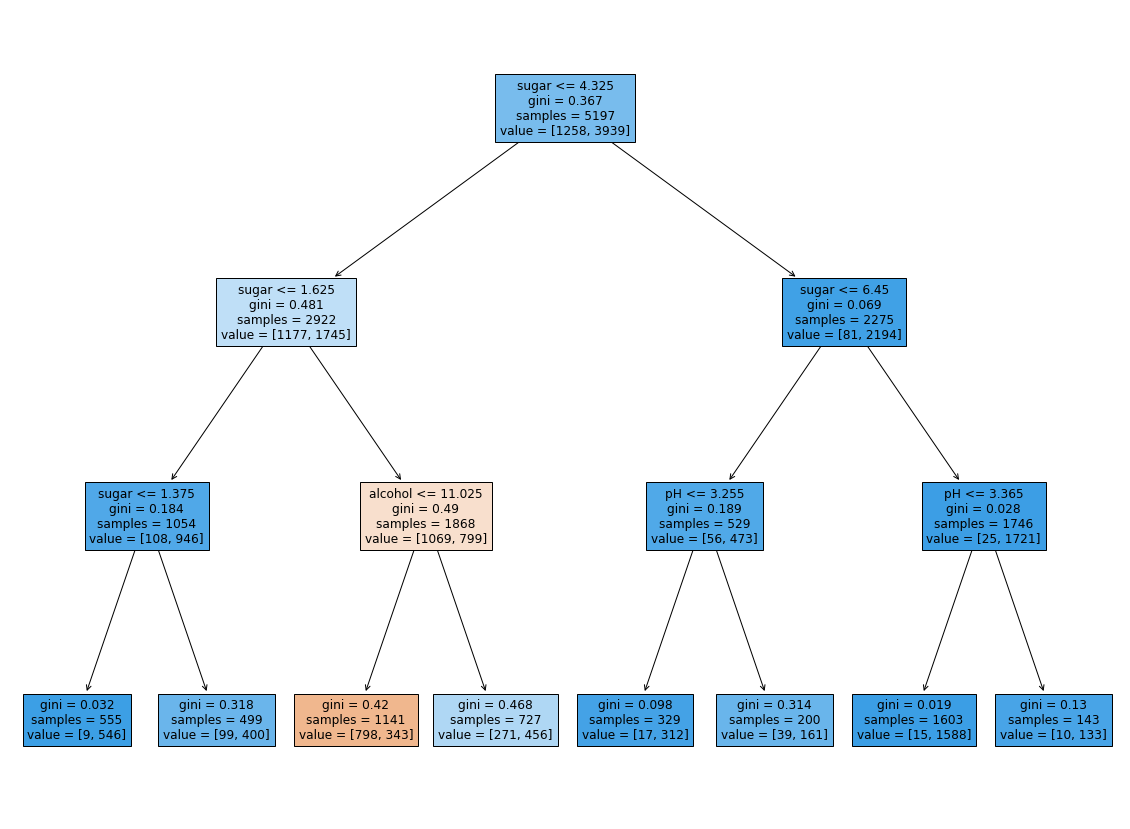

In [37]:
fig, ax = plt.subplots(figsize=(20, 15))
plot_tree(dt, 
          max_depth = 3, 
          filled=True, 
          feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

0.996921300750433
0.8584615384615385


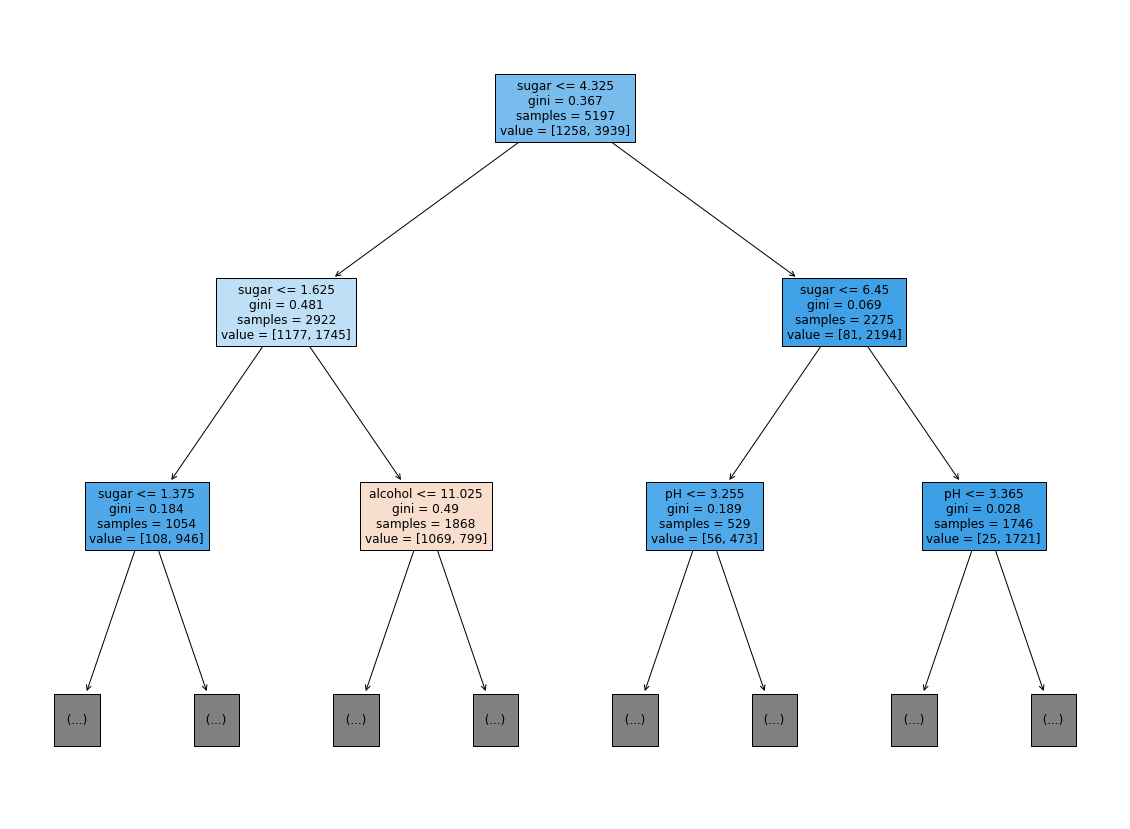

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state = 42
)

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

fig, ax = plt.subplots(figsize=(20, 15))
plot_tree(dt, 
          max_depth = 2, 
          filled=True, 
          feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

## 평가 3. 피처 공학 및 데이터 분리
- 교차검증을 위한 데이터세트를 준비한다. 
- 데이터 표준화를 진행한다. 

## 왜 여러 번 검증 해야하는가 ? 데이터의 확률을 좀 더 정확하게 확인하기 위해서이다.

In [41]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

### Input & Target 로 1차 분리를 시작해 놓는다.

In [ ]:
data = wine [['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

- train/valid/test 세트로 3가지로 분리한다.

In [42]:
from sklearn.model_selection import train_test_split 
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2, random_state=42
)

sub_input.shape, val_input.shape, sub_target.shape, val_target.shape

((4157, 3), (1040, 3), (4157,), (1040,))

- 모형을 만들고, val 모형 평가한다. 우선 데이터만 평가한다.

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


## 교차검증을 하기위해 세부 옵션 작업을 한다.

In [46]:
from sklearn.model_selection import cross_validate 
scores = cross_validate(dt, train_input, train_target)

print(scores)
print('*'*40)
scores['test_score']

{'fit_time': array([0.0202024 , 0.01250935, 0.00933695, 0.00930333, 0.00877905]), 'score_time': array([0.00078678, 0.0009172 , 0.00083232, 0.00077224, 0.00075531]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}
****************************************


array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])

# 검증 데이터 점수

In [48]:
import numpy as np

np.mean(scores['test_score'])

0.855300214703487

- StratifiedKFold 활용한다.
  + 통계용어 : 층화추출  (비율에 근거해서 추출하기) 
- 분류모형
  + 분류기준 / 레드와인 갯수, 화이트와인 갯수

In [49]:
from sklearn.model_selection import StratifiedKFold 
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [52]:
splitter = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8603073953073954


## 모형을 만들고 하이퍼파라미터 투입해 반복 수행한다.

## 랜덤 서치,  랜덤포레스트(RandomForest) 로 진행한다.

In [62]:
from scipy.stats import uniform, randint 

rgen = randint(0, 10)
np.unique(rgen.rvs(100), return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([11, 10,  8, 12, 14, 12,  8, 10,  7,  8]))

In [63]:
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((5197, 3), (1300, 3), (5197,), (1300,))

In [64]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score = True)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


- 가장 최적화된 데이터 표준화를 확인한다.

In [65]:
scores

{'fit_time': array([1.1262362 , 0.33772993, 0.34728885, 0.33531713, 0.33816004]),
 'score_time': array([0.10319471, 0.1020689 , 0.10201287, 0.10241628, 0.10175514]),
 'test_score': array([0.88461538, 0.88942308, 0.90279115, 0.88931665, 0.88642926]),
 'train_score': array([0.9971133 , 0.99663219, 0.9978355 , 0.9973545 , 0.9978355 ])}

## 평가 4. 머신러닝 모델링
- 분류 모형을 만들기 위해 다양한 알고리즘을 적용할 수 있다. 
- 분류 모형을 만들기 위해 하이퍼파라미터를 적용할 수 있다.


## 기본 정보를 통해 데이터를 추출해 본다.

-  알코올 도수 : 0.23167441     
- 당도 : 0.50039841
- ph : 0.26792718


In [68]:
rf.fit(train_input, train_target)

print(rf.feature_importances_)
print('*'*40)
wine.info()

[0.23167441 0.50039841 0.26792718]
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


## 다양한 알고리즘을 적용

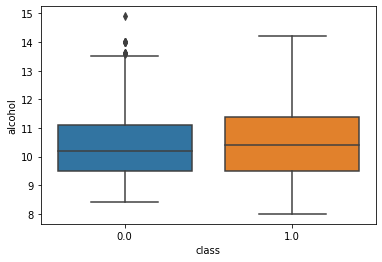

In [69]:
import seaborn as sns 

# sns.scatterplot(data = wine, x = 'pH', y = 'sugar', hue='class')
sns.boxplot(data=wine, x = 'class', y = 'alcohol')

- 복원 추출 한번도 추출이 않된 샘플이 있을 수 있어서 복원 추출한다.

In [70]:
rf = RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_) 
print(rf.score(train_input, train_target))
print(rf.score(test_input, test_target))

0.8934000384837406
0.996921300750433
0.8892307692307693


## 그레리디언트 부스팅
  + 사용하는 모델은 결정 트리

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 500, 
                                learning_rate=0.2,
                                subsample=0.5,
                                random_state=42)
scores = cross_validate(gb, train_input, train_target, 
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9434289514154802 0.8751230843266453


### Scikit-Learn API
- XGBoost


In [73]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8824322471423747 0.8726214185237284


- LightGBM

In [74]:
from lightgbm import LGBMClassifier 
lgb = LGBMClassifier(random_state=42)

scores = cross_validate(lgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9338079582727165 0.8789710890649293


In [75]:
from sklearn.model_selection import RandomizedSearchCV 

params = {'max_depth' : randint(2, 50), 
          'min_impurity_decrease' : uniform(0.0001, 0.1), 
          'min_samples_split' : randint(2, 50), 
          }

dt = DecisionTreeClassifier(random_state=42)

rs = RandomizedSearchCV(dt, params, n_iter = 100, random_state=42, n_jobs=-1)

rs.fit(train_input, train_target) 

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7f1a7f9f50>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7f1a7fd050>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7f1a7fd090>},
                   random_state=42)